In [1]:
using Distributions, Plots, StatsPlots,Random, StatsBase, LinearAlgebra, JLD2,Random,LaTeXStrings,Measures 
using Base:@kwdef;
using ProgressMeter
theme(:wong2)

Main.CP.pars(0.9, 1.0, 0.7071067811865476, 4.0, 10.0)


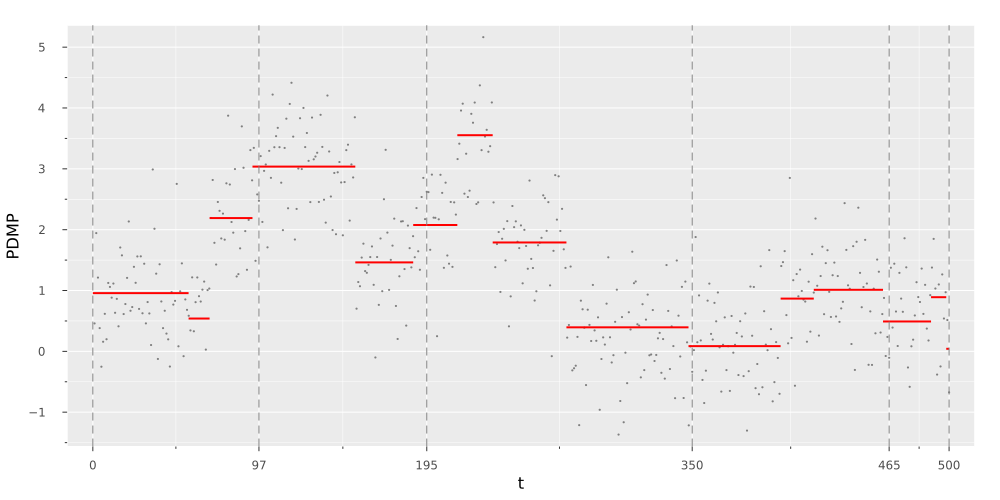

In [2]:

include("VRPF.jl");include("CP.jl");include("BlockVRPF.jl")
par = CP.pars();
T = [0.0,97.0,195.0,350,465,500];
J,y = CP.SimData(seed=1313)
p0=scatter(y.t[1:500],y.y[1:500],markersize=2.0,makerstrokewidth=0.0,label="",color=:grey,framestyle=:box,xlabel="t",ylabel="PDMP",xticks=T,size=(1000,500),margin=12.5pt)
extendedτ = [J.τ[1:15];[500.0]]
for i = 1:15
    plot!(extendedτ[i:i+1],repeat(J.ϕ[i:i],2),label="",color=:red,linewidth=2.0)
end
vline!(T,label="",color=:grey,linestyle=:dash)
current()


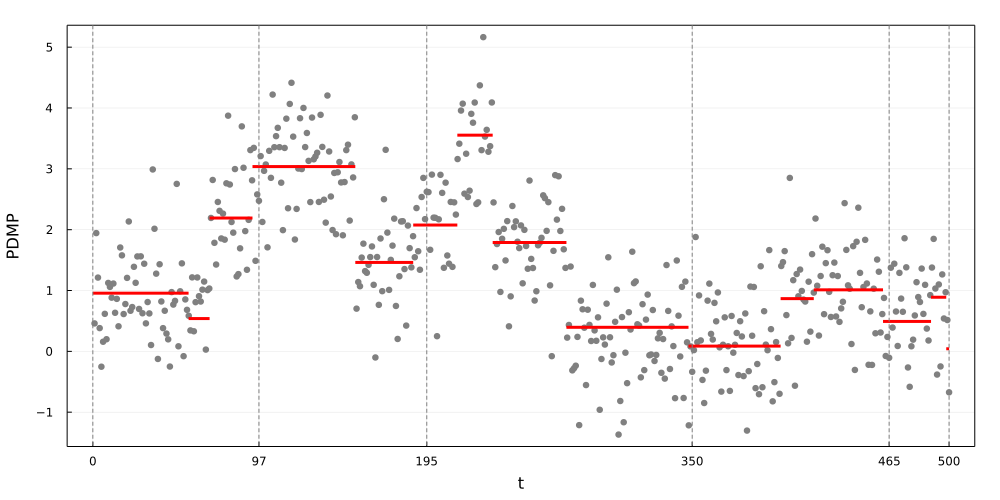

In [28]:
theme(:wong2)
scatter(y.t[1:500],y.y[1:500],markersize=3.75,markerstrokewidth=0.0,label="",color=:grey,framestyle=:box,xlabel="t",ylabel="PDMP",xticks=T,size=(1000,500),margin=12.5pt)
for i = 1:15
    plot!(extendedτ[i:i+1],repeat(J.ϕ[i:i],2),label="",color=:red,linewidth=3.0)
end
vline!(T,label="",color=:grey,linestyle=:dash)
current()

In [29]:
savefig("../PDMP-writeup/PF_Simulation_Data.pdf")

In [166]:
Random.seed!(220)
tauvec = zeros(1000,4)
ltauvec = zeros(1000,4)
tauvec2 = zeros(1000,4)
ltauvec2 = zeros(1000,4)
TauVec1 = zeros(1000,14)
TauVec2 = zeros(1000,14)
PhiVec1 = zeros(1000,14)
PhiVec2 = zeros(1000,14)
N = 500
@showprogress 1 for i = 1:1000
    R = VRPF.SMC(N,T,y,CP,par);
    BJ = VRPF.BS(R,y,T,CP,par).Path
    for j = 1:4
        index = findlast(BJ.τ .< T[j+1])
        lindex = findfirst(BJ.τ .> T[j+1])
        if isnothing(index)
            tauvec[i,j] = -Inf
        else
            tauvec[i,j] = BJ.τ[index]
        end
        if isnothing(lindex)
            ltauvec[i,j] = Inf
        else
            ltauvec[i,j] = BJ.τ[lindex]
        end
    end
    for j = 2:15
        index = findmin(abs.(BJ.τ .- J.τ[j]))[2]
        TauVec1[i,j-1] = BJ.τ[index]
        PhiVec1[i,j-1] = BJ.ϕ[index]
    end
    R = BlockVRPF.SMC(N,T,y,CP,par,[0.1,0.5]);
    BJ = BlockVRPF.BS(R,y,T,CP,par,[0.1,0.5]).Path
    for j = 1:4
        index = findlast(BJ.τ .< T[j+1])
        lindex = findfirst(BJ.τ .> T[j+1])
        if isnothing(index)
            tauvec2[i,j] = -Inf
        else
            tauvec2[i,j] = BJ.τ[index]
        end
        if isnothing(lindex)
            ltauvec2[i,j] = Inf
        else
            ltauvec2[i,j] = BJ.τ[lindex]
        end
    end
    for j = 2:15
        index = findmin(abs.(BJ.τ .- J.τ[j]))[2]
        TauVec2[i,j-1] = BJ.τ[index]
        PhiVec2[i,j-1] = BJ.ϕ[index]
    end
end

Progress: 100%|█████████████████████████████████████████| Time: 0:02:45


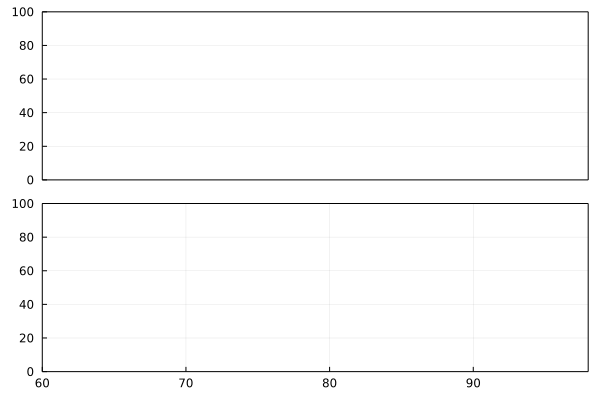

In [143]:
theme(:wong2)
n = 3
index = findlast(J.τ .< T[n+1])
lindex = findfirst(J.τ .> T[n+1])
p1 = histogram(tauvec[:,n],bins=200,color=:orange,xlim=(60,98),ylim=(0,100),label="",linewidth=0,framestyle=:box,xticks=:none)
vline!(J.τ[(index-1):index],color=:red,linewidth=3,label="")
vline!([T[n+1]],label="",color=:grey,linewidth=2.0,linestyle=:dash)
p2 = histogram(tauvec2[:,n],bins=200,color=:darkolivegreen,xlim=(60,98),ylim=(0,100),linewidth=0,label="",framestyle=:box)
vline!(J.τ[(index-1):index],color=:red,linewidth=3,label="")
vline!([T[n+1]],label="",color=:grey,linewidth=2.0,linestyle=:dash)
plot_preblock1 = plot(p1,p2,layout=(2,1))

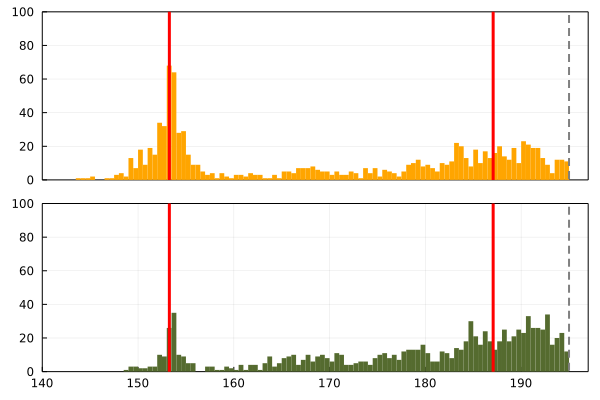

In [98]:
theme(:wong2)
n = 2
index = findlast(J.τ .< T[n+1])
lindex = findfirst(J.τ .> T[n+1])
p1 = histogram(tauvec[:,n],bins=200,color=:orange,xlim=(140,197),ylim=(0,100),label="",linewidth=0,framestyle=:box,xticks=:none)
vline!(J.τ[(index-1):index],color=:red,linewidth=3,label="")
vline!([T[n+1]],label="",color=:grey,linewidth=2.0,linestyle=:dash)
p2 = histogram(tauvec2[:,n],bins=200,color=:darkolivegreen,xlim=(140,197),ylim=(0,100),linewidth=0,label="",framestyle=:box)
vline!(J.τ[(index-1):index],color=:red,linewidth=3,label="")
vline!([T[n+1]],label="",color=:grey,linewidth=2.0,linestyle=:dash)
plot_preblock2 = plot(p1,p2,layout=(2,1))

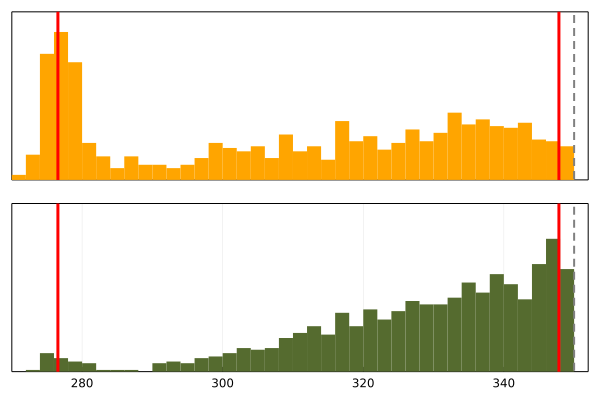

In [167]:
theme(:wong2)
n = 3
index = findlast(J.τ .< T[n+1])
lindex = findfirst(J.τ .> T[n+1])
p1 = histogram(tauvec[:,n],bins=50,color=:orange,xlim=(270,352),yticks=:none,ylim=(0,100),label="",linewidth=0,framestyle=:box,xticks=:none)
vline!(J.τ[(index-1):index],color=:red,linewidth=3,label="")
vline!([T[n+1]],label="",color=:grey,linewidth=2.0,linestyle=:dash)
p2 = histogram(tauvec2[:,n],bins=50,color=:darkolivegreen,xlim=(270,352),yticks=:none,ylim=(0,100),linewidth=0,label="",framestyle=:box)
vline!(J.τ[(index-1):index],color=:red,linewidth=3,label="")
vline!([T[n+1]],label="",color=:grey,linewidth=2.0,linestyle=:dash)
plot_preblock3 = plot(p1,p2,layout=(2,1))

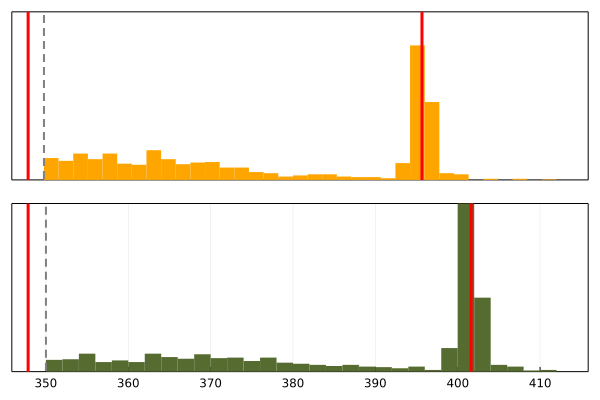

In [168]:
theme(:wong2)
n = 3
index = findlast(J.τ .< T[n+1])
lindex = findfirst(J.τ .> T[n+1])
p1 = histogram(ltauvec[:,n],bins=50,color=:orange,linewidth=0,ylim=(0,300),xticks=:none,ytick=:none,framestyle=:box,label="")
vline!(J.τ[index:lindex],color=:red,linewidth=3,label="")
vline!([T[n+1]],label="",color=:grey,linewidth=2.0,linestyle=:dash)
p2 = histogram(ltauvec2[:,n],bins=50,color=:darkolivegreen,linewidth=0,ylim=(0,300),yticks=:none,framestyle=:box,label="")
vline!(J.τ[index:lindex],color=:red,linewidth=3,label="")
vline!([T[n+1]],label="",color=:grey,linewidth=2.0,linestyle=:dash)
plot_postblock3 = plot(p1,p2,layout=(2,1))

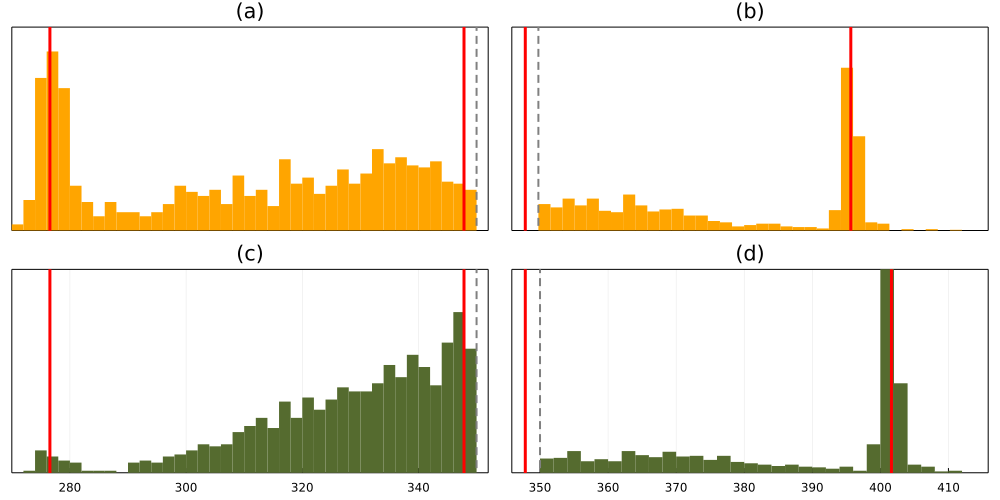

In [175]:
plot(plot_preblock3,plot_postblock3,layout=(1,2),size=(1000,500),titles=["(a)" "(c)" "(b)" "(d)"])

In [176]:
savefig("../PDMP-writeup/Histogram_T350.pdf")

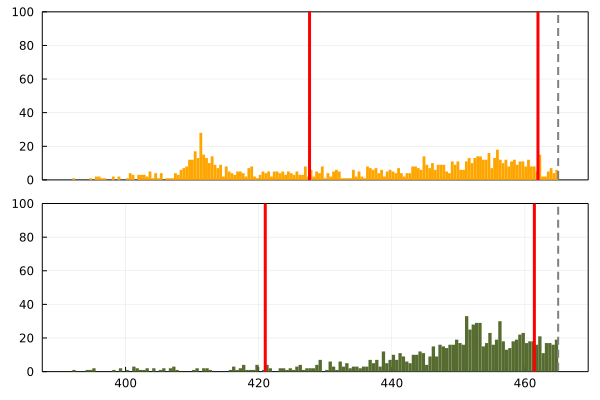

In [146]:
theme(:wong2)
n = 4
index = findlast(J.τ .< T[n+1])
lindex = findfirst(J.τ .> T[n+1])
p1 = histogram(tauvec[:,n],bins=200,color=:orange,ylim=(0,100),label="",linewidth=0,framestyle=:box,xticks=:none)
vline!(J.τ[(index-1):index],color=:red,linewidth=3,label="")
vline!([T[n+1]],label="",color=:grey,linewidth=2.0,linestyle=:dash)
p2 = histogram(tauvec2[:,n],bins=200,color=:darkolivegreen,ylim=(0,100),linewidth=0,label="",framestyle=:box)
vline!(J.τ[(index-1):index],color=:red,linewidth=3,label="")
vline!([T[n+1]],label="",color=:grey,linewidth=2.0,linestyle=:dash)
plot_preblock4 = plot(p1,p2,layout=(2,1))

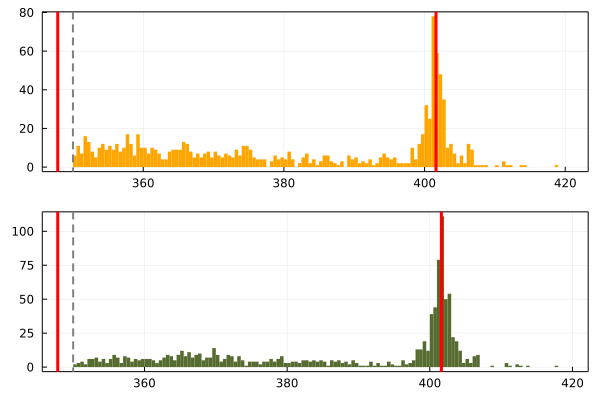

In [103]:
theme(:wong2)
n = 3
index = findlast(J.τ .< T[n+1])
lindex = findfirst(J.τ .> T[n+1])
p1 = histogram(ltauvec[:,n],bins=200,color=:orange,linewidth=0,framestyle=:box,label="")
vline!(J.τ[index:lindex],color=:red,linewidth=3,label="")
vline!([T[n+1]],label="",color=:grey,linewidth=2.0,linestyle=:dash)
p2 = histogram(ltauvec2[:,n],bins=200,color=:darkolivegreen,linewidth=0,framestyle=:box,label="")
vline!(J.τ[index:lindex],color=:red,linewidth=3,label="")
vline!([T[n+1]],label="",color=:grey,linewidth=2.0,linestyle=:dash)
plot(p1,p2,layout=(2,1))

In [198]:
theme(:wong2)
t = 3
p1 = histogram(TauVec1[:,t],label="",bins=100,color=:orange,linewidth=0,framestyle=:box,ylim=(0,80),xlim=(70,120))
vline!([J.τ[t+1]],color=:red,label="",linewidth=3)
scatter!([T[2]],[2.0],label="",markersize=8.0,markershape=:star6,color=:red)
p2 =histogram(TauVec2[:,t],label="",bins=100,color=:darkolivegreen,linewidth=0,framestyle=:box,ylim=(0,80),xlim=(70,120))
scatter!([T[2]],[2.0],label="",markersize=8.0,markershape=:star6,color=:red)
vline!([J.τ[t+1]],color=:red,label="",linewidth=3)
plot(p1,p2,layout=(1,2),size=(600,250))
savefig("../PDMP-writeup/Histogram_NearestJump3.pdf")

In [409]:
p1 = plot(((histogram(TauVec1[:,t],label="",linewidth=0,color=:orange,xlim=(0,500),bins=100,xticks=T,yticks=:none);histogram!(Vec2[:,t],label="",linewidth=0,color=:darkolivegreen,bins=100);vline!([J.τ[t+1]],color=:red,linewidth=3.0,label="",linestyle=:dash);scatter!(T,zeros(length(T));label="",color=:red,markersize=5.0,markershape=:star6)) for t in 1:5)...,layout=(5,1),size=(1500,1000))
savefig("hist1.pdf")
p2 = plot(((histogram(TauVec1[:,t],label="",linewidth=0,color=:orange,xlim=(0,500),bins=100,xticks=T,yticks=:none);histogram!(Vec2[:,t],label="",linewidth=0,color=:darkolivegreen,bins=100);vline!([J.τ[t+1]],color=:red,linewidth=3.0,label="",linestyle=:dash);scatter!(T,zeros(length(T));label="",color=:red,markersize=5.0,markershape=:star6)) for t in 6:10)...,layout=(5,1),size=(1500,1000))
savefig("hist2.pdf")
p3 = plot(((histogram(TauVec1[:,t],label="",linewidth=0,color=:orange,xlim=(0,500),bins=100,xticks=T,yticks=:none);histogram!(Vec2[:,t],label="",linewidth=0,color=:darkolivegreen,bins=100);vline!([J.τ[t+1]],color=:red,linewidth=3.0,label="",linestyle=:dash);scatter!(T,zeros(length(T));label="",color=:red,markersize=5.0,markershape=:star6)) for t in 11:14)...,layout=(4,1),size=(1500,800))
savefig("hist3.pdf")


In [415]:
p4 = plot(((histogram(PhiVec1[:,t],label="",linewidth=0,color=:orange,bins=100,yticks=:none);histogram!(PhiVec2[:,t],label="",linewidth=0,color=:darkolivegreen,bins=100);vline!([J.ϕ[t+1]],color=:red,linewidth=3.0,label="",linestyle=:dash)) for t in 1:5)...,layout=(5,1),size=(1500,1000))
savefig("hist4.pdf")
p5 = plot(((histogram(PhiVec1[:,t],label="",linewidth=0,color=:orange,bins=100,xticks=T,yticks=:none);histogram!(PhiVec2[:,t],label="",linewidth=0,color=:darkolivegreen,bins=100);vline!([J.ϕ[t+1]],color=:red,linewidth=3.0,label="",linestyle=:dash)) for t in 6:10)...,layout=(5,1),size=(1500,1000))
savefig("hist5.pdf")
p6 = plot(((histogram(PhiVec1[:,t],label="",linewidth=0,color=:orange,bins=100,xticks=T,yticks=:none);histogram!(PhiVec2[:,t],label="",linewidth=0,color=:darkolivegreen,bins=100);vline!([J.ϕ[t+1]],color=:red,linewidth=3.0,label="",linestyle=:dash)) for t in 11:14)...,layout=(4,1),size=(1500,800))
savefig("hist6.pdf")

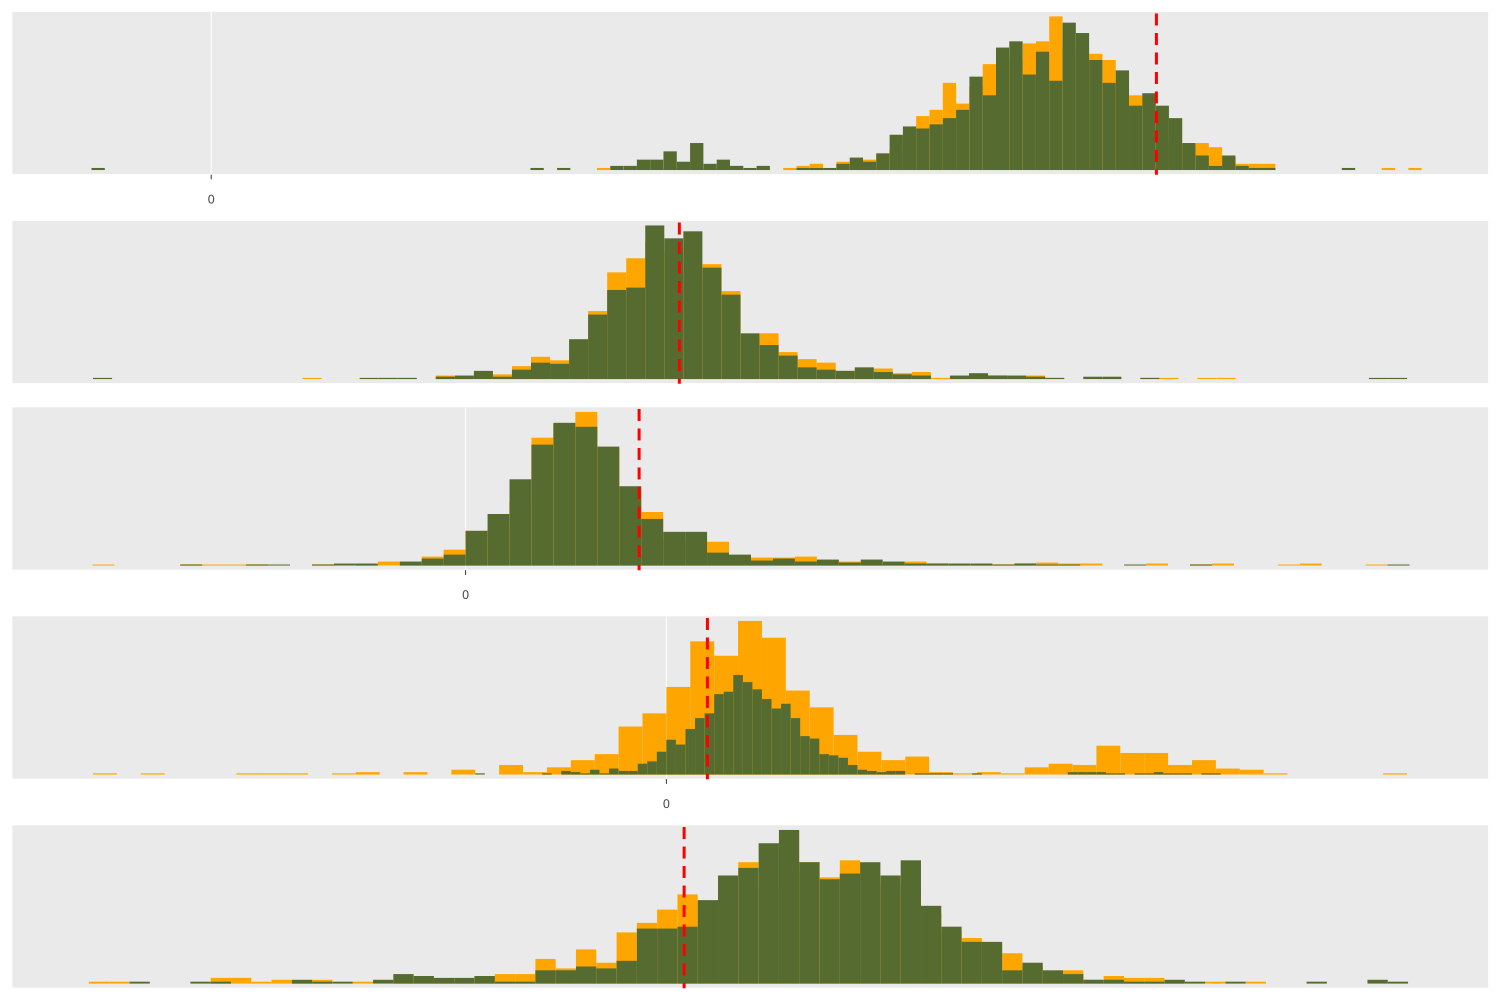

In [420]:
p5

In [221]:
p1 = plot(((histogram(TauVec1[:,t],bins=50,color=:orange,linewidth=0.0,label="",xlim=(0,500),xticks=:none,yticks=:none,framestyle=:box);vline!([J.τ[t+1]],label="",linestyle=:dash,color=:red,linewidth=3.0)) for t in 1:4)...,layout=(4,1),size=(1000,2500))
p2 = plot(((histogram(TauVec2[:,t],bins=50,color=:darkolivegreen,linewidth=0.0,label="",xlim=(0,500),xticks=:none,yticks=:none,framestyle=:box);vline!([J.τ[t+1]],label="",linestyle=:dash,color=:red,linewidth=3.0)) for t in 1:4)...,layout=(4,1),size=(1000,2500))
plot(p1,p2,layout=(1,2),size=(4000,3200))
savefig("../PDMP-writeup/PF-Sim-additionalplot1.pdf")

In [9]:
VRPFζ = Array{Any}(undef,1000)
Random.seed!(1313)
N = 100
VRPRTime = @timed for i = 1:1000
    R = VRPF.SMC(N,T,y,CP,par);
    VRPFζ[i] = VRPF.BS(R,y,T,CP,par).Path
end
VRPFTime.time

(value = nothing, time = 19.4052503, bytes = 31259858080, gctime = 4.2582164, gcstats = Base.GC_Diff(31259858080, 0, 0, 189603953, 4506706, 0, 4258216400, 336, 0))

In [10]:
BlockVRPFζ = Array{Any}(undef,1000)
N = 100
Random.seed!(12345)
BlockVRPFTime = @timed for i = 1:1000
    R = BlockVRPF.SMC(N,T,y,CP,par,[0.1,0.5]);
    BlockVRPFζ[i] = BlockVRPF.BS(R,y,T,CP,par,[0.1,0.5]).Path
end

(value = nothing, time = 21.9680368, bytes = 44274874576, gctime = 5.4467679, gcstats = Base.GC_Diff(44274874576, 0, 0, 277772431, 6325906, 0, 5446767900, 475, 0))

In [11]:
VRPFK = zeros(Int64,1000,5);
BlockVRPFK = zeros(Int64,1000,5);
for i = 1:1000
    for j = 1:5
        VRPFK[i,j] = length(findall(T[j] .< VRPFζ[i].τ .<= T[j+1]))
        BlockVRPFK[i,j] = length(findall(T[j] .< BlockVRPFζ[i].τ .<= T[j+1]))
    end
end

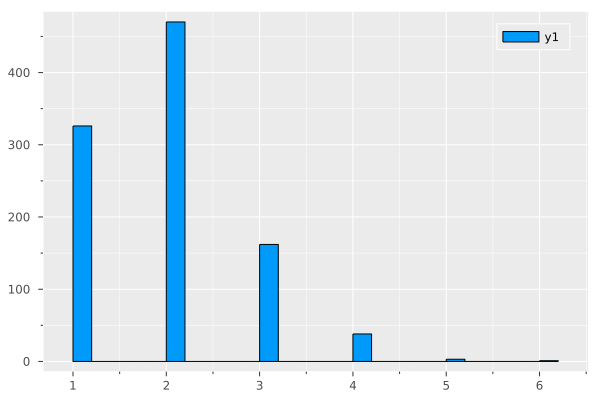

In [12]:
histogram(VRPFK[:,1])

In [159]:
VRPF3Jumpτ = zeros(3)
VRPF3Jumpϕ = zeros(3)
n=0
phi0 = 0 
for i = 1:1000
    if VRPFK[i,1] == 3
        index = findall(T[1] .< VRPFζ[i].τ .<= T[2])
        τ = VRPFζ[i].τ[index]
        ϕ = VRPFζ[i].ϕ[index]
        VRPF3Jumpτ = VRPF3Jumpτ .+ τ
        VRPF3Jumpϕ = VRPF3Jumpϕ .+ ϕ
        phi0 = VRPFζ[i].ϕ[1] + phi0
        n += 1
    end
end
Rτ = [[0.0];VRPF3Jumpτ/n]
Rϕ0 = phi0/n
Rϕ = [[Rϕ0];VRPF3Jumpϕ/n]


4-element Vector{Float64}:
 0.8248420629267716
 0.9474657358213678
 1.6385056620595486
 2.534502208920815

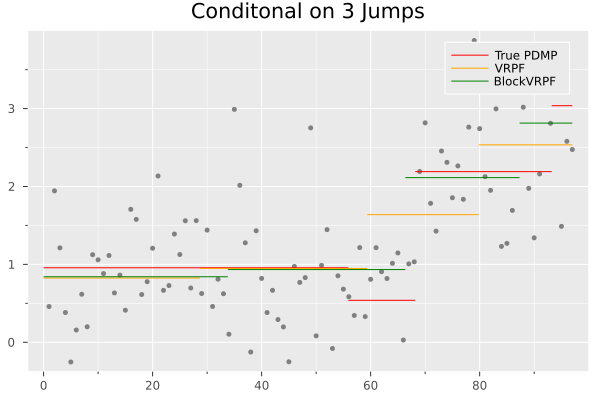

In [164]:
VRPF3Jumpτ = zeros(3)
VRPF3Jumpϕ = zeros(3)
n=0
phi0 = 0 
for i = 1:1000
    if VRPFK[i,1] == 3
        index = findall(T[1] .< VRPFζ[i].τ .<= T[2])
        τ = VRPFζ[i].τ[index]
        ϕ = VRPFζ[i].ϕ[index]
        VRPF3Jumpτ = VRPF3Jumpτ .+ τ
        VRPF3Jumpϕ = VRPF3Jumpϕ .+ ϕ
        phi0 = VRPFζ[i].ϕ[1] + phi0
        n += 1
    end
end
Rτ = [[0.0];VRPF3Jumpτ/n]
Rϕ0 = phi0/n
Rϕ = [[Rϕ0];VRPF3Jumpϕ/n]

BlockVRPF3Jumpτ = zeros(3)
BlockVRPF3Jumpϕ = zeros(3)
n = 0
phi0 = 0
for i = 1:1000
    if BlockVRPFK[i,1] == 3
        index = findall(T[1] .< BlockVRPFζ[i].τ .<= T[2])
        τ = BlockVRPFζ[i].τ[index]
        ϕ = BlockVRPFζ[i].ϕ[index]
        BlockVRPF3Jumpτ = BlockVRPF3Jumpτ .+ τ
        BlockVRPF3Jumpϕ = BlockVRPF3Jumpϕ .+ ϕ
        phi0 = phi0 + BlockVRPFζ[i].ϕ[1]
        n += 1
    end
end
Bτ = [[0.0];BlockVRPF3Jumpτ/n]
Bϕ0 = phi0/n
Bϕ = [[Bϕ0];BlockVRPF3Jumpϕ/n]
scatter(y.y[1:97],label="",color=:grey,markerstrokesize=0.0,markersize=3.0,title="Conditonal on 3 Jumps")
for i = 1:3
    plot!(J.τ[i:i+1],repeat([J.ϕ[i]],2),label="",color=:red)
    plot!(Rτ[i:i+1],repeat([Rϕ[i]],2),label="",color=:orange)
    plot!(Bτ[i:i+1],repeat([Bϕ[i]],2),label="",color=:green)
end
plot!([J.τ[4],T[2]],repeat([J.ϕ[4]],2),label="True PDMP",color=:red)
plot!([Rτ[end],T[2]],repeat([Rϕ[4]],2),label="VRPF",color=:orange)
plot!([Bτ[end],T[2]],repeat([Bϕ[4]],2),label="BlockVRPF",color=:green)

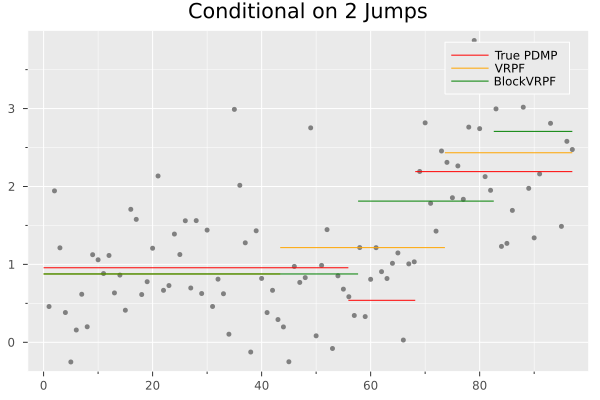

In [165]:
K = 2
VRPF3Jumpτ = zeros(K)
VRPF3Jumpϕ = zeros(K)
n=0
phi0 = 0 
for i = 1:1000
    if VRPFK[i,1] == K
        index = findall(T[1] .< VRPFζ[i].τ .<= T[2])
        τ = VRPFζ[i].τ[index]
        ϕ = VRPFζ[i].ϕ[index]
        VRPF3Jumpτ = VRPF3Jumpτ .+ τ
        VRPF3Jumpϕ = VRPF3Jumpϕ .+ ϕ
        phi0 = VRPFζ[i].ϕ[1] + phi0
        n += 1
    end
end
Rτ = [[0.0];VRPF3Jumpτ/n]
Rϕ0 = phi0/n
Rϕ = [[Rϕ0];VRPF3Jumpϕ/n]

BlockVRPF3Jumpτ = zeros(K)
BlockVRPF3Jumpϕ = zeros(K)
n = 0
phi0 = 0
for i = 1:1000
    if BlockVRPFK[i,1] == K
        index = findall(T[1] .< BlockVRPFζ[i].τ .<= T[2])
        τ = BlockVRPFζ[i].τ[index]
        ϕ = BlockVRPFζ[i].ϕ[index]
        BlockVRPF3Jumpτ = BlockVRPF3Jumpτ .+ τ
        BlockVRPF3Jumpϕ = BlockVRPF3Jumpϕ .+ ϕ
        phi0 = phi0 + BlockVRPFζ[i].ϕ[1]
        n += 1
    end
end
Bτ = [[0.0];BlockVRPF3Jumpτ/n]
Bϕ0 = phi0/n
Bϕ = [[Bϕ0];BlockVRPF3Jumpϕ/n]
scatter(y.y[1:97],label="",color=:grey,markerstrokesize=0.0,markersize=3.0,title="Conditional on 2 Jumps")
for i = 1:K
    plot!(J.τ[i:i+1],repeat([J.ϕ[i]],2),label="",color=:red)
    plot!(Rτ[i:i+1],repeat([Rϕ[i]],2),label="",color=:orange)
    plot!(Bτ[i:i+1],repeat([Bϕ[i]],2),label="",color=:green)
end
plot!([J.τ[K+1],T[2]],repeat([J.ϕ[K+1]],2),label="True PDMP",color=:red)
plot!([Rτ[end],T[2]],repeat([Rϕ[K+1]],2),label="VRPF",color=:orange)
plot!([Bτ[end],T[2]],repeat([Bϕ[K+1]],2),label="BlockVRPF",color=:green)

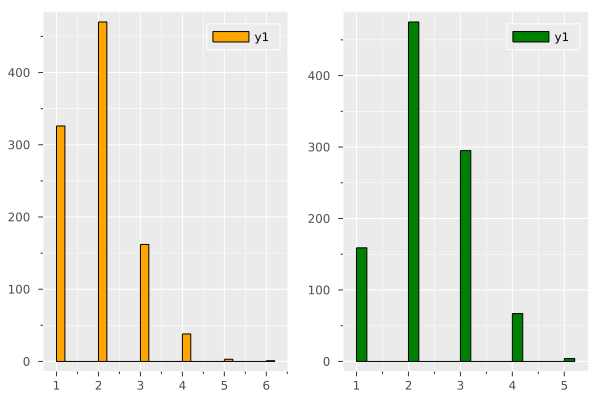

In [13]:
p1 = histogram(VRPFK[:,1],color=:orange)
p2 = histogram(BlockVRPFK[:,1],color=:green)
plot(p1,p2,layout=(1,2))

In [ ]:
4